Récupération des données...
✓ n°1/Data_Landscape.txt lu
✓ n°1/marche_aleatoire.txt lu (301 étapes)
✓ n°2/Data_Landscape.txt lu
✓ n°2/marche_aleatoire.txt lu (301 étapes)
✓ n°3/Data_Landscape.txt lu
✓ n°3/marche_aleatoire.txt lu (301 étapes)
✓ n°4/Data_Landscape.txt lu
✓ n°4/marche_aleatoire.txt lu (301 étapes)
✓ n°5/Data_Landscape.txt lu
✓ n°5/marche_aleatoire.txt lu (301 étapes)
✓ n°6/Data_Landscape.txt lu
✓ n°6/marche_aleatoire.txt lu (301 étapes)
✓ n°7/Data_Landscape.txt lu
✓ n°7/marche_aleatoire.txt lu (301 étapes)
✓ n°8/Data_Landscape.txt lu
✓ n°8/marche_aleatoire.txt lu (301 étapes)
✓ n°9/Data_Landscape.txt lu
✓ n°9/marche_aleatoire.txt lu (301 étapes)
✓ n°10/Data_Landscape.txt lu
✓ n°10/marche_aleatoire.txt lu (301 étapes)

MOYENNES DES RÉSUMÉS GLOBAUX

HOMO:
  Lc moyen: 1.00 ± 0.00
  Δmoy moyen: 1.0356 ± 0.0446

LUMO:
  Lc moyen: 1.00 ± 0.00
  Δmoy moyen: 1.3735 ± 0.0596

GAP:
  Lc moyen: 1.00 ± 0.00
  Δmoy moyen: 0.8205 ± 0.0530

GÉNÉRATION DU GRAPHIQUE

✓ Graph saved: HOMO_LU

<Figure size 1200x800 with 0 Axes>

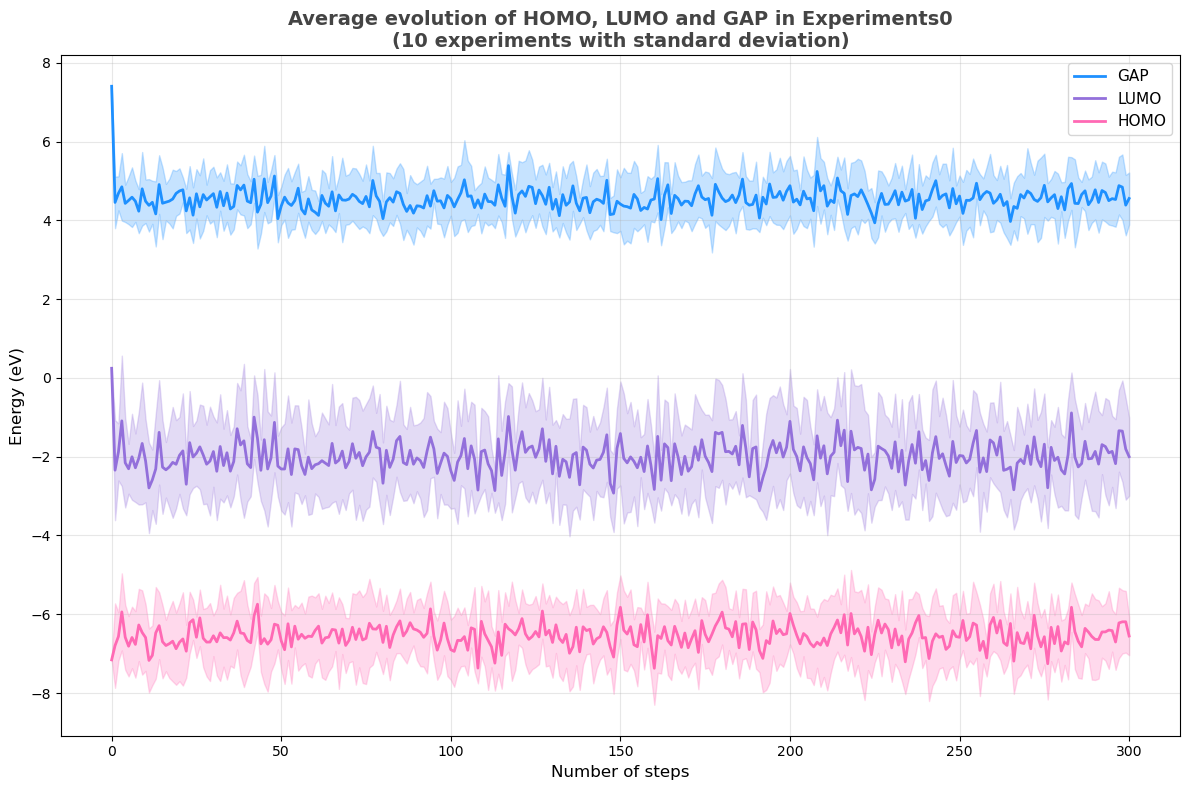

In [1]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt

def extract_landscape_data(file_path):
    """Extrait les données du fichier Data_Landscape.txt"""
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            content = f.read()
        
        # Extraction des données du RÉSUMÉ GLOBAL
        homo_match = re.search(r'HOMO:\s+Lc=([\d.]+),\s+Δmoy=([\d.]+)', content)
        lumo_match = re.search(r'LUMO:\s+Lc=([\d.]+),\s+Δmoy=([\d.]+)', content)
        gap_match = re.search(r'GAP:\s+Lc=([\d.]+),\s+Δmoy=([\d.]+)', content)
        
        if homo_match and lumo_match and gap_match:
            return {
                'HOMO': {'Lc': float(homo_match.group(1)), 'Delta': float(homo_match.group(2))},
                'LUMO': {'Lc': float(lumo_match.group(1)), 'Delta': float(lumo_match.group(2))},
                'GAP': {'Lc': float(gap_match.group(1)), 'Delta': float(gap_match.group(2))}
            }
    except Exception as e:
        print(f"Erreur lors de la lecture de {file_path}: {e}")
    
    return None

def extract_marche_data(file_path):
    """Extrait les énergies HOMO, LUMO et GAP à chaque étape"""
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            content = f.read()
        
        # Recherche de toutes les étapes
        steps = []
        pattern = r'ÉTAPE\s+(\d+).*?HOMO:\s+([-\d.]+)\s+Ha.*?LUMO:\s+([-\d.]+)\s+Ha.*?GAP:\s+([\d.]+)\s+eV'
        matches = re.finditer(pattern, content, re.DOTALL)
        
        for match in matches:
            step_num = int(match.group(1))
            homo = float(match.group(2))
            lumo = float(match.group(3))
            gap = float(match.group(4))
            steps.append({
                'step': step_num,
                'HOMO': homo,
                'LUMO': lumo,
                'GAP': gap
            })
        
        return steps
    except Exception as e:
        print(f"Erreur lors de la lecture de {file_path}: {e}")
    
    return None

def main():
    # Collecte des données
    landscape_data = []
    marche_data = []
    
    print("Récupération des données...")
    for i in range(1, 11):
        folder_name = f"n°{i}"
        
        # Lecture Data_Landscape.txt
        landscape_file = os.path.join(folder_name, "Data_Landscape.txt")
        if os.path.exists(landscape_file):
            data = extract_landscape_data(landscape_file)
            if data:
                landscape_data.append(data)
                print(f"✓ {folder_name}/Data_Landscape.txt lu")
        else:
            print(f"✗ {landscape_file} non trouvé")
        
        # Lecture marche_aleatoire.txt
        marche_file = os.path.join(folder_name, "marche_aleatoire.txt")
        if os.path.exists(marche_file):
            steps = extract_marche_data(marche_file)
            if steps:
                marche_data.append(steps)
                print(f"✓ {folder_name}/marche_aleatoire.txt lu ({len(steps)} étapes)")
        else:
            print(f"✗ {marche_file} non trouvé")
    
    # Calcul des moyennes pour Data_Landscape
    if landscape_data:
        print("\n" + "="*70)
        print("MOYENNES DES RÉSUMÉS GLOBAUX")
        print("="*70)
        
        for prop in ['HOMO', 'LUMO', 'GAP']:
            lc_values = [d[prop]['Lc'] for d in landscape_data]
            delta_values = [d[prop]['Delta'] for d in landscape_data]
            
            print(f"\n{prop}:")
            print(f"  Lc moyen: {np.mean(lc_values):.2f} ± {np.std(lc_values):.2f}")
            print(f"  Δmoy moyen: {np.mean(delta_values):.4f} ± {np.std(delta_values):.4f}")
    
    # Traitement des données de marche aléatoire
    if marche_data:
        print("\n" + "="*70)
        print("GÉNÉRATION DU GRAPHIQUE")
        print("="*70)
        
        # Trouver le nombre maximum d'étapes
        max_steps = max(len(exp) for exp in marche_data)
        
        # Initialiser les matrices pour stocker toutes les valeurs
        homo_matrix = []
        lumo_matrix = []
        gap_matrix = []
        
        # Remplir les matrices (conversion en eV pour HOMO et LUMO)
        for exp in marche_data:
            homo_exp = [step['HOMO'] * 27.2114 for step in exp]  # Hartree -> eV
            lumo_exp = [step['LUMO'] * 27.2114 for step in exp]
            gap_exp = [step['GAP'] for step in exp]
            
            homo_matrix.append(homo_exp)
            lumo_matrix.append(lumo_exp)
            gap_matrix.append(gap_exp)
        
        # Calculer moyennes et écarts-types à chaque étape
        steps = range(max_steps)
        homo_means = []
        homo_stds = []
        lumo_means = []
        lumo_stds = []
        gap_means = []
        gap_stds = []
        
        for step in steps:
            homo_values = [exp[step] for exp in homo_matrix if step < len(exp)]
            lumo_values = [exp[step] for exp in lumo_matrix if step < len(exp)]
            gap_values = [exp[step] for exp in gap_matrix if step < len(exp)]
            
            homo_means.append(np.mean(homo_values))
            homo_stds.append(np.std(homo_values))
            lumo_means.append(np.mean(lumo_values))
            lumo_stds.append(np.std(lumo_values))
            gap_means.append(np.mean(gap_values))
            gap_stds.append(np.std(gap_values))
        
        # Créer le graphique
        plt.figure(figsize=(12, 8))
        
        # Convertir en arrays numpy
        steps_array = np.array(steps)
        homo_means = np.array(homo_means)
        homo_stds = np.array(homo_stds)
        lumo_means = np.array(lumo_means)
        lumo_stds = np.array(lumo_stds)
        gap_means = np.array(gap_means)
        gap_stds = np.array(gap_stds)
        
         # Create plot
        plt.figure(figsize=(12, 8))
        steps_array = np.array(steps)

        # Define pastel colors
        homo_color = "#FF69B4"   # Hot pink
        lumo_color = "#9370DB"   # Lavender purple
        gap_color = "#1E90FF"    # Soft turquoise

        # Plot GAP
        plt.plot(steps_array, gap_means, '-', color=gap_color, label='GAP', linewidth=2)
        plt.fill_between(steps_array, np.array(gap_means) - np.array(gap_stds),
                         np.array(gap_means) + np.array(gap_stds),
                         alpha=0.25, color=gap_color)
        
        # Plot LUMO
        plt.plot(steps_array, lumo_means, '-', color=lumo_color, label='LUMO', linewidth=2)
        plt.fill_between(steps_array, np.array(lumo_means) - np.array(lumo_stds),
                         np.array(lumo_means) + np.array(lumo_stds),
                         alpha=0.25, color=lumo_color)
        
        # Plot HOMO
        plt.plot(steps_array, homo_means, '-', color=homo_color, label='HOMO', linewidth=2)
        plt.fill_between(steps_array, np.array(homo_means) - np.array(homo_stds),
                         np.array(homo_means) + np.array(homo_stds),
                         alpha=0.25, color=homo_color)

        script_dir = os.path.basename(os.getcwd())
        
        plt.xlabel('Number of steps', fontsize=12)
        plt.ylabel('Energy (eV)', fontsize=12)
        plt.title(f'Average evolution of HOMO, LUMO and GAP in {script_dir}\n(10 experiments with standard deviation)', 
                  fontsize=14, fontweight='bold', color='#444')


        plt.legend(fontsize=11)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        
        plt.savefig('HOMO_LUMO_GAP_evolution.png', dpi=300, bbox_inches='tight')
        print(f"\n✓ Graph saved: HOMO_LUMO_GAP_evolution.png")
        print(f"  Number of steps: {max_steps}")
        print(f"  Number of experiments: {len(marche_data)}")

        plt.show()
    else:
        print("\n✗ Aucune donnée de marche aléatoire trouvée")

if __name__ == "__main__":
    main()